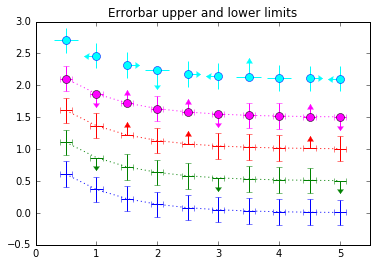

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.5, 5.5, 0.5)
y = np.exp(-x)
xerr = 0.1
yerr = 0.2
ls = 'dotted'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# standard error bars
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=ls, color='blue')

# including upper limits
uplims = np.zeros(x.shape)
uplims[[1, 5, 9]] = True
plt.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims, ls=ls,
             color='green')

# including lower limits
lolims = np.zeros(x.shape)
lolims[[2, 4, 8]] = True
plt.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims, ls=ls,
             color='red')

# including upper and lower limits
plt.errorbar(x, y + 1.5, marker='o', ms=8, xerr=xerr, yerr=yerr,
             lolims=lolims, uplims=uplims, ls=ls, color='magenta')

# including xlower and xupper limits
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True
uplims[[3]] = True
plt.errorbar(x, y + 2.1, marker='o', ms=8, xerr=xerr, yerr=yerr,
             xlolims=xlolims, xuplims=xuplims, uplims=uplims, lolims=lolims,
             ls='none', mec='blue', capsize=0, color='cyan')

ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

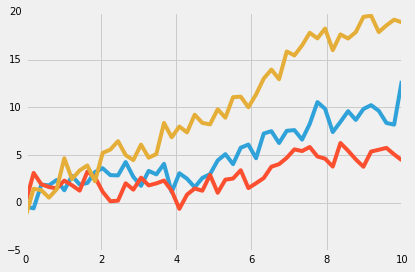

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 10)

with plt.style.context('fivethirtyeight'):
    plt.plot(x, np.sin(x) + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 2 * x + np.random.randn(50))


plt.show()

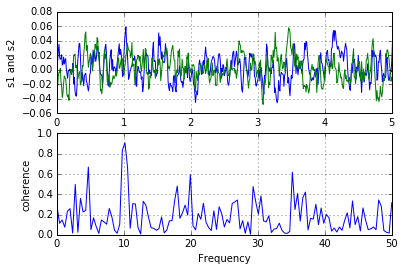

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, 'b-', t, s2, 'g-')
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence')
plt.show()